# Imports and seeds

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from random import gauss
from random import gammavariate
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#import LogisticRegression
from sklearn.linear_model import LogisticRegression
#import Probit
from statsmodels.discrete.discrete_model import Probit
#import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
#import QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
#import regression
from sklearn.linear_model import LinearRegression as lm
#split
from sklearn.model_selection import train_test_split
#MSE
from sklearn.metrics import mean_squared_error
#Polynomials
from sklearn.preprocessing import PolynomialFeatures
#Kfold
from sklearn.model_selection import KFold
#CV scoring
from sklearn.model_selection import cross_val_score

seed(101057684)



# Classification

## Generating Data

1. I create 3 lists and I run through a for loop appending a gaussian standard normal into each list.

2. Next I create a dataframe using the pandas libary, we call each column its repective parameter

3. I create a helper function to create the y value

4. I apply the helper function to the dataframe

In [2]:
#Creating lists to store values
x1 = []
x2 = []
x3 = []
#Create a 1000 samples
for _ in range(1000):
    #Standard normal distribution
    value1 = gauss(0, 1)
    value2 = gauss(0, 1)
    value3 = gauss(0, 1)
    #inserting into lists 
    x1.append(value1)
    x2.append(value2)
    x3.append(value3)

#Create a pandas dataframe(easier to work with)
df = pd.DataFrame(
    {'x_1': x1,
     'x_2': x2,
     'x_3': x3
    })

#This function is used to create the y value!
def createoutputvariable(x1,x2,x3):
    if (x1 >= 0 and x2 >= 0 and x3 >= 0):
        return 1
    if (x1 < 0 and x2 < 0 and x3 < 0):
        return 1
    else:
        return 0

#Create the y value by inserting x's into the function
df['y'] = df.apply(lambda x: createoutputvariable(x.x_1, x.x_2, x.x_3), axis=1)

## Error Rate
> 1/n * sum(y_i != y)


In [3]:
#Function to Calculate the error rate
def errorratefunc(y, ypred):
    n = 0
    error = 0
    for i, k in zip(y, ypred):
        n += 1 
        if (i != k):
            error += 1
    return error/n

In [4]:
#Seperating X and Y from the dataframe
X = df.drop('y',axis=1).values
y = df['y'].values

## Logit and Probit

In [5]:
#Fitting the logit model
logit_model = LogisticRegression()
logit_fitted = logit_model.fit(X,y)

#predicting the logit values
ypredlogit = logit_fitted.predict(X)

errorrate = errorratefunc(y,ypredlogit)
print(f"The error rate for logit is: {errorrate}")

The error rate for logit is: 0.219


In [6]:
#Fitting the probit model
probit_model = Probit(y, X)
probit_model = probit_model.fit()
ypredprobit = probit_model.predict(linear = True)
ypredprobit = ypredprobit.round()

errorrate = errorratefunc(y, ypredprobit)
print(f"The error rate for probit is: {errorrate}")

Optimization terminated successfully.
         Current function value: 0.691741
         Iterations 3
The error rate for probit is: 0.219


## Linear Discriminant Analysis  

In [7]:
#Fitting the LDA model 
LDA_model = LDA()
LDA_fit = LDA_model.fit(X,y)

#Predicting the y values
ypredLDA = LDA_fit.predict(X)

errorrate = errorratefunc(y, ypredLDA)
print(f"The error rate for LDA is: {errorrate}")

The error rate for LDA is: 0.219


## QDA

In [8]:
#Fitting the QDA
QDA_model = QDA()
QDA_fit = QDA_model.fit(X,y)

#Predicting the QDA 
ypredQDA = QDA_fit.predict(X)

errorrate = errorratefunc(y, ypredQDA)
print(f"The error rate for QDA is: {errorrate}")

The error rate for QDA is: 0.135


## KNN

In [9]:
#Create a list so i could easily loop through k neighbors(Just writing less code this way)
neighbors = [1,5,10]
for i in neighbors:

    #Setup a knn classifier with k neighbors
    knn_model = KNeighborsClassifier(n_neighbors=i)

    #Fit the model
    knn_model.fit(X, y)

    ypredknn = knn_model.predict(X)
    errorrate = errorratefunc(y, ypredknn)

    print(f"error rate: {errorrate},  KNN Neighbor:{i}")



error rate: 0.0,  KNN Neighbor:1
error rate: 0.032,  KNN Neighbor:5
error rate: 0.048,  KNN Neighbor:10


## Questions for Classification

1. Which of the parametric models work best? Is there an explanation for why this model works best?
> QDA worked best, at the error rate of 0.135. QDA estimates individual covariance matrix for every class of observations. QDA is useful if there is prior knowledge that individual classes exhibit distinct covariances. LDA is a much less flexible classifier than QDA, LDA can suffer from high bias. QDA tends to be a better than LDA if there are more training observations.(i.e 1000). 

2. Which of the non-parametric models work best? Is there an explanation for why this model works best?
> KNN of neighbor 1 had the lowest error rate. When K = 1 we see that the the trianing sample will choose the closest training sample to our test sample. Since our test sample is the training set, our model when KNN = 1 will choose itself as the closest, thats why it's error rate is 0.

# Cross Validation

In [10]:
#Here I create the DGP functions 
def DGP1(X):
    xi = X.xi
    e = X.e
    y = 2 + xi + e
    return y

def DGP2(X):
    xi = X.xi
    e = X.e
    a = (0.5*(xi**2))
    b = (0.25*(xi**3))
    y = 2 + xi + a + b + e
    return y

def DGP3(X):
    xi = X.xi
    e = X.e
    a = (0.5*(xi**2))
    b = (0.25*(xi**3))
    c = ((0.125)*(xi**4))
    d = ((0.0625)*(xi**5))
    y = 2 + xi + a + b + c + d + e
    return y

In [11]:
#Function to calculate MSE
def msefunc(y, yprime):
    return mean_squared_error(y, yprime)

In [12]:
#Function Returns a dictionary of transformed polynomials
def polycreate(dgp):
    X1 = PolynomialFeatures(1).fit_transform(dgp['xi'].values.reshape(-1,1))
    X2 = PolynomialFeatures(2).fit_transform(dgp['xi'].values.reshape(-1,1))
    X3 = PolynomialFeatures(3).fit_transform(dgp['xi'].values.reshape(-1,1))
    X4 = PolynomialFeatures(4).fit_transform(dgp['xi'].values.reshape(-1,1))
    X5 = PolynomialFeatures(5).fit_transform(dgp['xi'].values.reshape(-1,1))
    X6 = PolynomialFeatures(6).fit_transform(dgp['xi'].values.reshape(-1,1))

    
    dictionary = {'X1': X1,'X2': X2,'X3': X3,'X4': X4,'X5': X5,'X6': X6}
    return dictionary


In [13]:
#This function is the Container/Controller of this question. It calls the polycreate function that generates the polynomial data for our x's We create 3 temp datas list (for each crossvalidation question). So we can pass it through to our Actual data list containers. Then we loop the the dictionary that our polynomial function creates and  we call each function that constructs the crossvalidation method passing each polynomial inside.
def construct(dgp, dgpmselist, dgpkf5list, dgpkf10list):
    data = polycreate(dgp)
    y = dgp['y'].values
    tempdata = []
    tempdata2 = []
    tempdata3 = []
    for key in data:
        tempdata.append(constructtrain(data[key], y))
        tempdata2.append(constructkfold(data[key], y, 5))
        tempdata3.append(constructkfold(data[key], y, 10))
    dgpmselist.append(tempdata)
    dgpkf5list.append(tempdata2)
    dgpkf10list.append(tempdata3)

In [14]:
#Question 1 function
def constructtrain(X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        model = lm().fit(X_train, y_train)
        predict = model.predict(X_test)
        return msefunc(y_test, predict)   

In [15]:
#Question 2/3 Function
def constructkfold(X, y, k):
    crossvalidation = KFold(n_splits=k)
    model = lm().fit(X,y)
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation, n_jobs=1)
    return np.mean(np.abs(scores))




### Note: The code underneath will take 5ish min to run

In [16]:
#Creating lists to store our values
dgp1mselist = []
dgp2mselist = []
dgp3mselist = []
dgp1kf5list = []
dgp2kf5list = []
dgp3kf5list = []
dgp1kf10list = []
dgp2kf10list = []
dgp3kf10list = []

num_rep = 1000


#Starting the montecarlo simulation
for _ in range(num_rep):
    #List empties every rep for new simulated values
    X = []
    e = []


    #Create 500 samples
    for _ in range(500):
        value1 = gauss(0, 1) 
        value2 = gauss(0, 1)
        X.append(value1)
        e.append(value2)

    #Using Pandas for ease of use(could probably optmise this to do this better)
    dgp1 = pd.DataFrame(
    {'xi': X,
    'e': e
    })
    dgp2 = pd.DataFrame(
    {'xi': X,
    'e': e
    })
    dgp3 = pd.DataFrame(
    {'xi': X,
    'e': e
    })

    dgp1["y"] = DGP1(dgp1)
    dgp2["y"] = DGP2(dgp2)
    dgp3["y"] = DGP3(dgp3)
    
    #Call the main controller function 
    construct(dgp1, dgp1mselist, dgp1kf5list, dgp1kf10list)
    construct(dgp2, dgp2mselist, dgp2kf5list, dgp2kf10list)
    construct(dgp3, dgp3mselist, dgp3kf5list, dgp3kf10list)



In [17]:
#Function to turn into dataframe and renames the columns for each Cross validation test
def turnintodf(ls):
    df = pd.DataFrame(ls, columns=["X1", "X2", "X3","X4", "X5", "X6"])
    return df

#Function to print and calculate the fraction of replications 
def fractionofreplicaton(df):   
    df['X1_Result'] = (df.iloc[:, 1:5].values > df[['X1']].values).all(axis=1).astype(int)
    df['X2_Result'] = (df.iloc[:, [0,2,3,4,5]].values > df[['X2']].values).all(axis=1).astype(int)
    df['X3_Result'] = (df.iloc[:, [0,1,3,4,5]].values > df[['X3']].values).all(axis=1).astype(int)
    df['X4_Result'] = (df.iloc[:, [0,1,2,4,5]].values > df[['X4']].values).all(axis=1).astype(int)
    df['X5_Result'] = (df.iloc[:, [0,1,2,3,5]].values > df[['X5']].values).all(axis=1).astype(int)
    df['X6_Result'] = (df.iloc[:, [0,1,2,3,4]].values > df[['X6']].values).all(axis=1).astype(int)

    for i in ["X1_Result", "X2_Result", "X3_Result" , "X4_Result", "X5_Result", "X6_Result"]:
        freq = df[i].value_counts(sort = False).tolist()
        freq = ((1000-freq[0])/1000)*100
        print(f"The Fraction of replications for polynomial {i[:-7]} is {freq}")

## MSE

### For DGP1

In [18]:
fractionofreplicaton(turnintodf(dgp1mselist))

The Fraction of replications for polynomial X1 is 25.3
The Fraction of replications for polynomial X2 is 21.3
The Fraction of replications for polynomial X3 is 16.1
The Fraction of replications for polynomial X4 is 18.2
The Fraction of replications for polynomial X5 is 12.0
The Fraction of replications for polynomial X6 is 9.3


### For DGP2

In [19]:
fractionofreplicaton(turnintodf(dgp2mselist))

The Fraction of replications for polynomial X1 is 0.0
The Fraction of replications for polynomial X2 is 0.3
The Fraction of replications for polynomial X3 is 33.300000000000004
The Fraction of replications for polynomial X4 is 27.500000000000004
The Fraction of replications for polynomial X5 is 22.0
The Fraction of replications for polynomial X6 is 16.900000000000002


### For DGP3

In [20]:
fractionofreplicaton(turnintodf(dgp3mselist))

The Fraction of replications for polynomial X1 is 0.0
The Fraction of replications for polynomial X2 is 0.0
The Fraction of replications for polynomial X3 is 0.7000000000000001
The Fraction of replications for polynomial X4 is 5.4
The Fraction of replications for polynomial X5 is 51.800000000000004
The Fraction of replications for polynomial X6 is 42.1


## K Fold of 5

### DGP1

In [21]:
fractionofreplicaton(turnintodf(dgp1kf5list))


The Fraction of replications for polynomial X1 is 66.4
The Fraction of replications for polynomial X2 is 14.799999999999999
The Fraction of replications for polynomial X3 is 9.6
The Fraction of replications for polynomial X4 is 5.1
The Fraction of replications for polynomial X5 is 3.4000000000000004
The Fraction of replications for polynomial X6 is 1.7999999999999998


### DGP 2

In [22]:
fractionofreplicaton(turnintodf(dgp2kf5list))

The Fraction of replications for polynomial X1 is 0.0
The Fraction of replications for polynomial X2 is 0.0
The Fraction of replications for polynomial X3 is 68.0
The Fraction of replications for polynomial X4 is 18.3
The Fraction of replications for polynomial X5 is 9.6
The Fraction of replications for polynomial X6 is 4.1000000000000005


### DGP 3



In [23]:
fractionofreplicaton(turnintodf(dgp3kf5list))

The Fraction of replications for polynomial X1 is 0.0
The Fraction of replications for polynomial X2 is 0.0
The Fraction of replications for polynomial X3 is 0.3
The Fraction of replications for polynomial X4 is 0.1
The Fraction of replications for polynomial X5 is 79.10000000000001
The Fraction of replications for polynomial X6 is 20.5


## K Fold of 10

### DGP1

In [24]:
fractionofreplicaton(turnintodf(dgp1kf10list))

The Fraction of replications for polynomial X1 is 69.39999999999999
The Fraction of replications for polynomial X2 is 13.8
The Fraction of replications for polynomial X3 is 8.200000000000001
The Fraction of replications for polynomial X4 is 5.0
The Fraction of replications for polynomial X5 is 2.7
The Fraction of replications for polynomial X6 is 1.7000000000000002


### DGP2

In [25]:
fractionofreplicaton(turnintodf(dgp2kf10list))

The Fraction of replications for polynomial X1 is 0.0
The Fraction of replications for polynomial X2 is 0.0
The Fraction of replications for polynomial X3 is 71.39999999999999
The Fraction of replications for polynomial X4 is 16.3
The Fraction of replications for polynomial X5 is 7.3999999999999995
The Fraction of replications for polynomial X6 is 4.9


### DGP3

In [26]:
fractionofreplicaton(turnintodf(dgp3kf10list))

The Fraction of replications for polynomial X1 is 0.0
The Fraction of replications for polynomial X2 is 0.0
The Fraction of replications for polynomial X3 is 0.2
The Fraction of replications for polynomial X4 is 0.0
The Fraction of replications for polynomial X5 is 80.4
The Fraction of replications for polynomial X6 is 19.400000000000002


## Is there any relationship between the true degree of the DGP and the degree of the selected model. 

> We see that the selected model will select the polynomial that represents the true degree of the DGP more than the ones that dont. For example, DGP3 with the degree of 5. The polynomial model that represents the same degree (i.e. polynomial 5) will be the most selected model.

## Which of the selection tools (MSE, 5-fold, 10-fold) works best?

> We see 10-fold works best. It is more accurate at predicting the true degree polynomial. How 10 folds work is that the data is divided into 10 folds with the same size, then training is done on 9 folds of the data and testing is done on the remaining fold. We see this would be better than doing 5 folds 

# Bootstrapping 

In [27]:
import scipy.stats as st
import math
from numpy.random import standard_t
import seaborn as sns
from statsmodels.regression import linear_model 

Text(0.5, 1.0, 'Kernel Density of a 1000 draws using a t(100-2) Distribution')

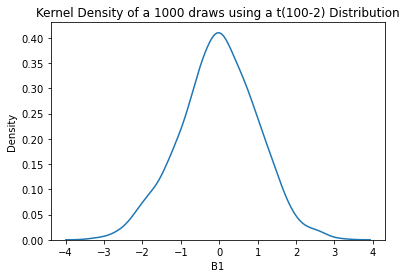

In [28]:
student_t = standard_t(100-2, 1000)
ax = sns.kdeplot(student_t)
ax.set(xlabel="B1", ylabel = "Density")
ax.set_title("Kernel Density of a 1000 draws using a t(100-2) Distribution")


In [29]:
def geny(x,e):
    y = b0 + (b1*x) + e
    return


In [30]:
b0 = 0 
b1 = 0
tvaluelist=[]

for _ in range(1000):
    Xmonte = []
    Ymonte = []
    for _ in range(100):

        x = gauss(0, 1)
        e = gauss(0, 1)
        y = b0 + (b1*x) + e

        Xmonte.append(x)
        Ymonte.append(y)

    model = linear_model.OLS(Ymonte,Xmonte)
    results = model.fit()
    tvaluelist.append(results.tvalues[0])

Text(0.5, 1.0, 'Kernel Density of a 1000 t-statistics using Monte Carlo')

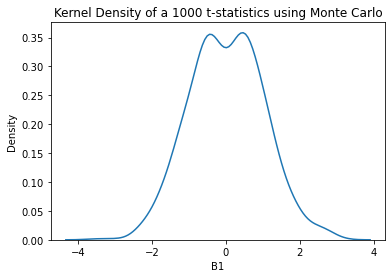

In [31]:
ax = sns.kdeplot(tvaluelist)
ax.set(xlabel="B1", ylabel = "Density")
ax.set_title("Kernel Density of a 1000 t-statistics using Monte Carlo")


In [32]:
# scikit-learn bootstrap
from sklearn.utils import resample

In [33]:
Xboot = []
Yboot = []

for _ in range(100):

    x = gauss(0, 1)
    e = gauss(0, 1)
    y = b0 + (b1*x) + e
    Xboot.append(x)
    Yboot.append(y)

data = pd.DataFrame({"y":Yboot, "x":Xboot})
    
boot = resample(data, replace=True, n_samples=1000)

In [34]:
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
tvaluelistboot = []
values = data.values
# run bootstrap
for _ in range(n_iterations):
    # prepare train and test sets
    train = resample(data, n_samples=n_size)
    y = train['y'].values
    x = train['x'].values
    x= x.reshape((50,1))
    # fit model
    model = linear_model.OLS(y,x)
    result = model.fit()

    tvaluelistboot.append(result.tvalues[0])

Text(0.5, 1.0, 'Kernel Density of a 1000 bootstrap samples t-statistics')

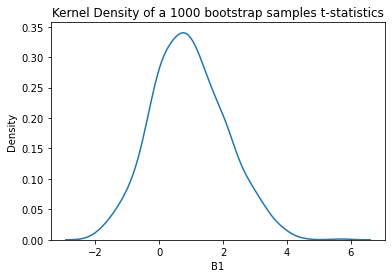

In [35]:
ax = sns.kdeplot(tvaluelistboot)
ax.set(xlabel="B1", ylabel = "Density")
ax.set_title("Kernel Density of a 1000 bootstrap samples t-statistics")

## Comment on the similarities or differences between the three densities
>simularities: The densities between the first density(1000 draws from the t(100−2) distribution) and the second density(montecarlo) are the most simular with their beta1 distribution is roughly centered around 0. Also paying attention to the tails of the distribution we see that the tails are similar between the first and second density. Though between the second and third(Bootstrap) density we see that the height is roughly the same. 

> differences: The the third density Beta1 is roughly centered around 1 while compared to the first and second densities are centered at 0. Also paying attention to the tails of the distribution we see that the tails of the third density is longer than the first and second density. TWe see that the first density is taller than the second and third density


## Kolmogorov-Smirnov Test Two Sample Test
> Kolmogorov-Smirnov Test is a nonparametric test of the equality of continuous probability distributions that can be used to compare a sample or two samples with a probability distribution. It is uses both location and shape of the empirical cumulative distribution functions of the two samples. 

* Null Hypothesis: There is no difference between the two t-statistic distributions
* Alt Hypothesis: There is a difference between the two t-statistic distributions

In [36]:
# Kolmogorov-Smirnov Test Import
from scipy.stats import ks_2samp

ks_2samp(tvaluelist,tvaluelistboot)

KstestResult(statistic=0.312, pvalue=2.153892257575863e-43)

> From the K-S test we see the p-value = 0 which is statistically significant. We see we have strong evidence against the null hypothesis. Therefore, we reject the null hypothesis, and accept the alternative hypothesis.